In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC


In [3]:
data = pd.read_csv('dataset.csv')
data

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

C:\Users\verti\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\verti\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\verti\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\verti\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

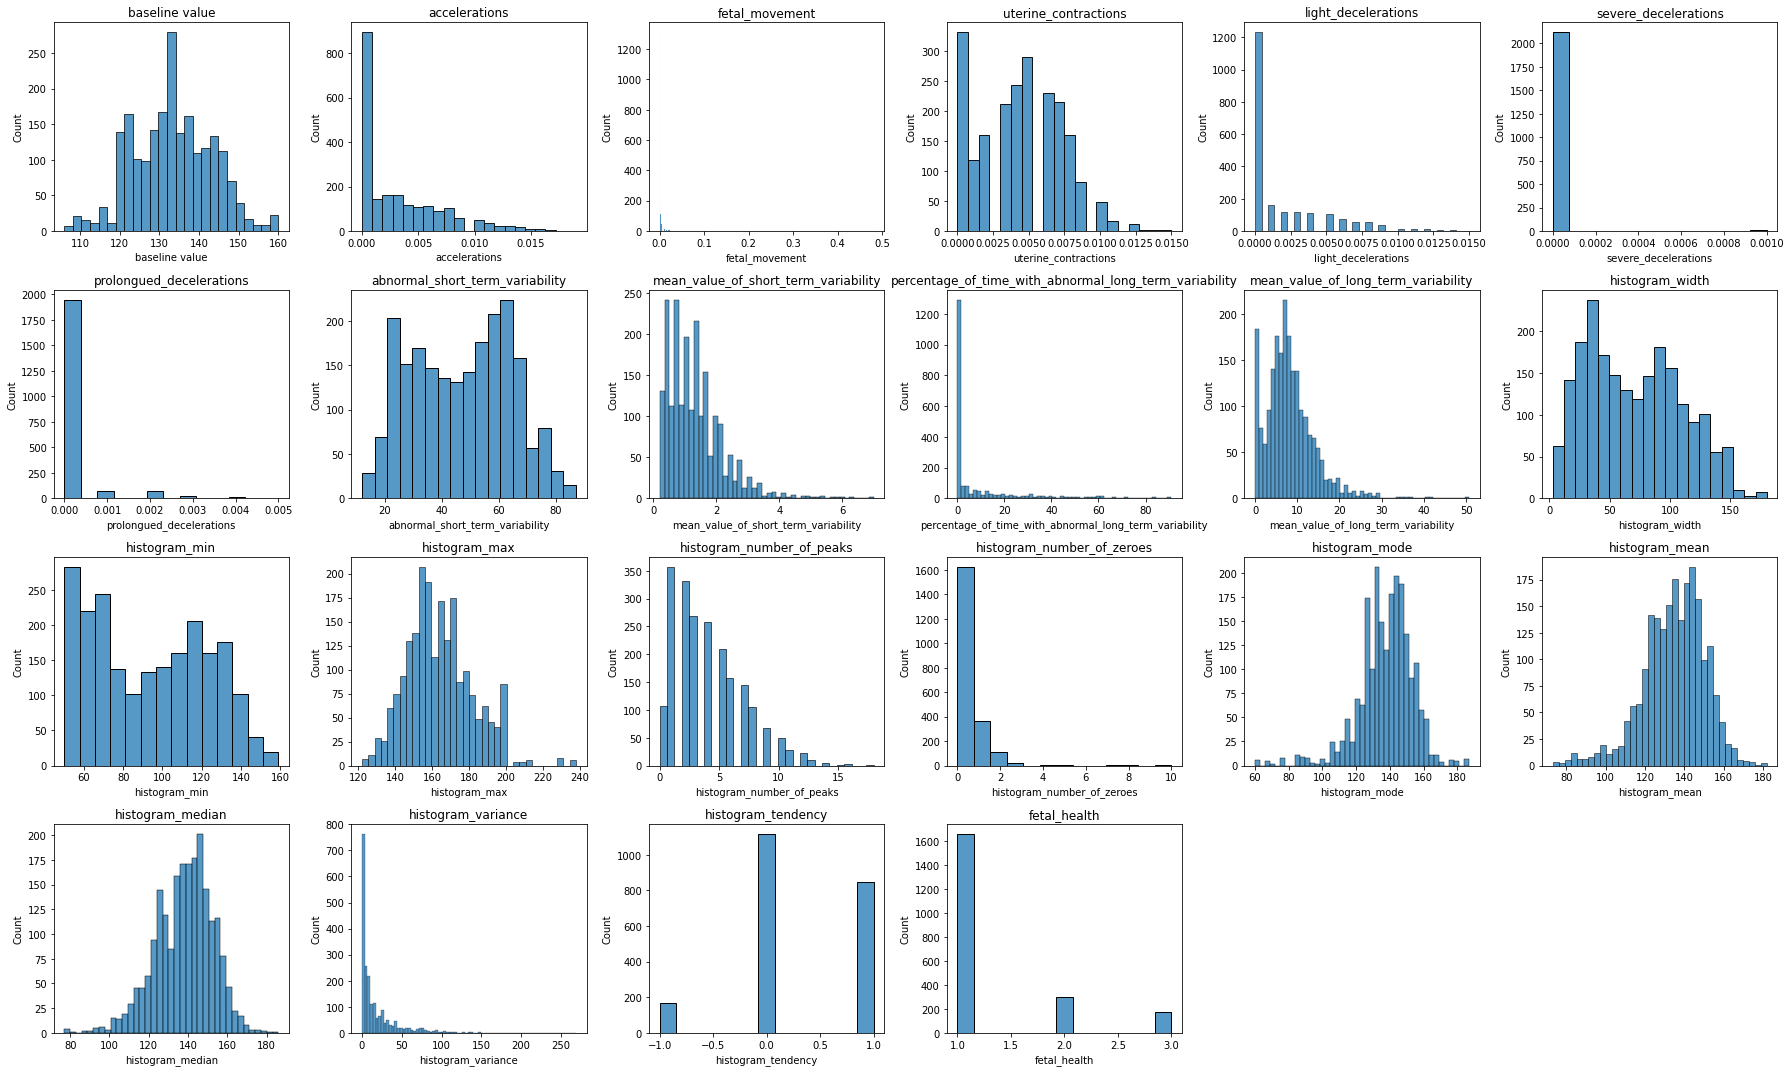

In [5]:
plt.figure(figsize=(25, 15))

for i, column in enumerate(data.columns):
    plt.subplot(4, 6, i + 1)
    sns.histplot(data=data[column])
    plt.title(column)

plt.tight_layout()
plt.show()

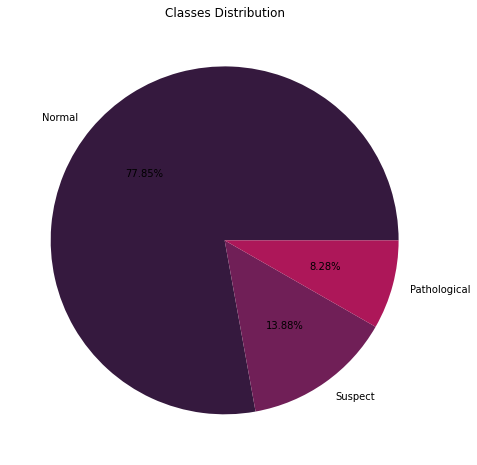

In [6]:
value_counts = data['fetal_health'].value_counts()

plt.figure(figsize=(8, 8))

# Plotting the pie chart
plt.pie(
    value_counts,
    autopct='%.2f%%',
    labels=value_counts.index.map({1: "Normal", 2: "Suspect", 3: "Pathological"}),
    colors=sns.color_palette('rocket')
)

plt.title("Classes Distribution")
plt.show()

In [7]:
y = data['fetal_health']
x = data.drop('fetal_health', axis=1)

In [8]:
y_remapped = y.map({1: 0, 2: 1, 3: 2})

In [9]:
x_n = np.array(x)
y_n = np.array(y_remapped)
x_n

array([[1.20e+02, 0.00e+00, 0.00e+00, ..., 1.21e+02, 7.30e+01, 1.00e+00],
       [1.32e+02, 6.00e-03, 0.00e+00, ..., 1.40e+02, 1.20e+01, 0.00e+00],
       [1.33e+02, 3.00e-03, 0.00e+00, ..., 1.38e+02, 1.30e+01, 0.00e+00],
       ...,
       [1.40e+02, 1.00e-03, 0.00e+00, ..., 1.52e+02, 4.00e+00, 1.00e+00],
       [1.40e+02, 1.00e-03, 0.00e+00, ..., 1.51e+02, 4.00e+00, 1.00e+00],
       [1.42e+02, 2.00e-03, 2.00e-03, ..., 1.45e+02, 1.00e+00, 0.00e+00]])

In [10]:
y_n

array([1, 0, 0, ..., 1, 1, 0], dtype=int64)

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_n)


In [12]:
x_scaled

array([[-1.35222005, -0.8223883 , -0.20320955, ..., -1.18164215,
         1.87056871,  1.11298001],
       [-0.1325256 ,  0.73013282, -0.20320955, ...,  0.13203796,
        -0.23499819, -0.52452553],
       [-0.03088439, -0.04612774, -0.20320955, ..., -0.00624416,
        -0.2004807 , -0.52452553],
       ...,
       [ 0.68060404, -0.56363478, -0.20320955, ...,  0.96173066,
        -0.51113811,  1.11298001],
       [ 0.68060404, -0.56363478, -0.20320955, ...,  0.8925896 ,
        -0.51113811,  1.11298001],
       [ 0.88388645, -0.30488126, -0.16034157, ...,  0.47774325,
        -0.61469058, -0.52452553]])

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_remapped, test_size=0.2, random_state=42)
x_train

array([[-0.84401403, -0.8223883 , -0.20320955, ..., -0.7667958 ,
        -0.58017309, -0.52452553],
       [ 0.68060404, -0.8223883 , -0.20320955, ...,  0.27032007,
        -0.5456556 , -0.52452553],
       [-1.14893765, -0.8223883 , -0.20320955, ..., -1.18164215,
        -0.5456556 , -0.52452553],
       ...,
       [-1.14893765,  0.4713793 , -0.20320955, ..., -0.83593686,
         0.42083412, -0.52452553],
       [-1.86042608, -0.04612774, -0.20320955, ..., -0.62851369,
         0.90407899, -0.52452553],
       [ 0.88388645, -0.56363478, -0.20320955, ...,  0.75430748,
        -0.51113811,  1.11298001]])

In [15]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(x_train, y_train)
print(model)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)


In [17]:
from sklearn.metrics import accuracy_score, classification_report
y_test_pred = model.predict(x_test)
test_accuracy = accuracy_score(y_test, y_test_pred) * 100
print(f"Accuracy score: {test_accuracy:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

Accuracy score: 96.01%

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       333
           1       0.89      0.86      0.87        64
           2       0.94      1.00      0.97        29

    accuracy                           0.96       426
   macro avg       0.93      0.95      0.94       426
weighted avg       0.96      0.96      0.96       426



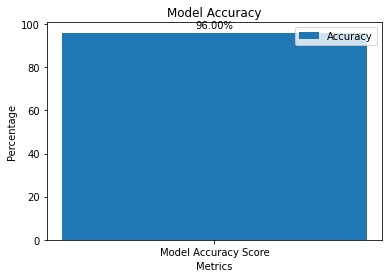

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming your test accuracy is already calculated
accuracy = 96.00  # Replace this with your actual test accuracy

# Data for plotting
labels = ['Model Accuracy Score']
accuracies = [accuracy]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x, accuracies, width, label='Accuracy')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Metrics')
ax.set_ylabel('Percentage')
ax.set_title('Model Accuracy')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Add text annotations to the bar
for rect in rects1:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}%',
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

# Show the plot
plt.show()


In [19]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)
print(model)
y_test_pred = model.predict(x_test)
test_accuracy = accuracy_score(y_test, y_test_pred) * 100
print(f"Accuracy score: {test_accuracy:.2f}%")


LogisticRegression()
Accuracy score: 87.79%


In [20]:
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       333
           1       0.63      0.64      0.64        64
           2       0.73      0.76      0.75        29

    accuracy                           0.88       426
   macro avg       0.77      0.78      0.77       426
weighted avg       0.88      0.88      0.88       426



In [21]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
print(model)

DecisionTreeClassifier()


In [23]:
y_test_pred = model.predict(x_test)
test_accuracy = accuracy_score(y_test, y_test_pred) * 100
print(f"Accuracy score: {test_accuracy:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

Accuracy score: 92.25%

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       333
           1       0.76      0.84      0.80        64
           2       0.87      0.93      0.90        29

    accuracy                           0.92       426
   macro avg       0.86      0.90      0.88       426
weighted avg       0.93      0.92      0.92       426

